# Анализ бизнес-показателей приложения Procrastinate Pro+.

## Описаниие проекта.

В проекте исследуются данные о пользователях приложения Procrastinate Pro+, привлечённых с 1 мая по 27 октября 2019 года. 
Дата исследования - 1 ноября 2019 года. 
В бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. 
Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Необходимо найти причину и выйти в плюс по прибыли. 

## Задачи проекта. 

Изучить:
 - откуда приходят пользователи и какими устройствами они пользуются,
 - сколько стоит привлечение пользователей из различных рекламных каналов;
 - сколько денег приносит каждый клиент,
 - когда расходы на привлечение клиента окупаются,
 - какие факторы мешают привлечению клиентов компании выйти в плюс.

## План исследования. 

1. Загрузить данные и подготовь их к анализу.
2. Задать функции для расчёта и анализа LTV, ROI, удержания и конверсии.
3. Провести исследовательский анализ данных.
4. Рассчитать и проанализировать маркетинговые показатели. 
5. Оценить окупаемость рекламы.
6. Сделать выводы.

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

## 1. Загрузка и подготовка данных. 

In [2]:
# загружаем файлы
    visits, orders, costs = (
    pd.read_csv('C:/Users/dnast/Downloads/Data Analyst/Проект. Бизнес-показатели/visits_info_short.csv'),
    pd.read_csv('C:/Users/dnast/Downloads/Data Analyst/Проект. Бизнес-показатели/orders_info_short.csv'),
    pd.read_csv('C:/Users/dnast/Downloads/Data Analyst/Проект. Бизнес-показатели/costs_info_short.csv'),  
    )

In [3]:
# выводим первые пять строк
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
# информация о датасете
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


**Пропусков нет. Название столбцов не соответствуют pep8, также нужно заменить тип данных на datetime в начале и окончании сессий.** 

In [5]:
# меняем названия колонок
visits.columns = [col.lower().replace(' ', '_') for col in visits.columns]

In [6]:
# меняем тип данных
visits.session_start = pd.to_datetime(visits.session_start)
visits.session_end = pd.to_datetime(visits.session_start)

In [7]:
# проверка
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


**В visits все изменения проведены корректно.** 

In [8]:
# проверка на неявные дубликаты
visits.region.unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [9]:
# проверка на неявные дубликаты
visits.device.unique()

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

In [10]:
# проверка на неявные дубликаты
visits.channel.unique()

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [11]:
# проверка на явные дубликаты
visits.duplicated().sum()

0

**Явных и неявных дубликатов нет. Искать дубликаты по подмножеству нет необходимости в этом наборе данных.**

In [12]:
# первые пять строк файла
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [13]:
# информация о датасете
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


**Пропусков нет, нужно перевести данные в pep8 и заменить тип даты на datetime.**

In [14]:
# корректируем названия столбцов
orders.columns = [col.lower().replace(' ', '_') for col in orders.columns]

In [15]:
# меняем тип данных
orders.event_dt = pd.to_datetime(orders.event_dt)

In [16]:
# проверка
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


**Все изменения произведены корректно.** 

In [17]:
# проверка на полные дубликаты
orders.duplicated().sum()

0

**Дубликатов нет.**

In [18]:
# первые пять строк
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [19]:
# информация о датасете
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


**Пропусков нет, нужно привести названия столбцов к pep8 и заменить тип данных на datetime.** 

In [22]:
# корректируем названия колонок
costs.columns = [col.lower() for col in costs.columns]

In [23]:
# меняем тип данных
costs.dt = pd.to_datetime(costs.dt).dt.date

In [24]:
# проверка
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


**Все изменения произведены корректно.** 

In [25]:
# проверка на неявные дубликаты
costs.channel.unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

In [26]:
# проверка на явные дубликаты
costs.duplicated().sum()

0

**Дубликатов нет.**

## 2. Функции для расчёта и анализа LTV, ROI, удержания и конверсии.

### Функция для создания пользовательских профилей.

In [27]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

### Функция для расчёта удержания.

In [28]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция для расчёта конверсии.

In [29]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция для расчёта LTV и ROI.

In [30]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

### Функция для сглаживания фрейма.

In [31]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

### Функция для визуализации удержания.

In [32]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

### Функция для визуализации конверсии.

In [33]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Функция для визуализации LTV и ROI.

In [34]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(15, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## 3. Исследовательский анализ данных


### 3.1. Составляем профили пользователей. 

In [35]:
# создаём профили пользователей
profiles = get_profiles(visits,orders, costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [36]:
# проверяем минимальную дату
profiles.dt.min()

datetime.date(2019, 5, 1)

In [37]:
# проверяем максимальную дату
profiles.dt.max()

datetime.date(2019, 10, 27)

**Минимальная дата привлечения - 1 мая 2019 года, максимальная - 27 октября 2019 года. Данные представлены за период, которые заявлен изначально.**

### 3.2. Исследование профилей по странам и конверсии в платящих пользователей.

In [38]:
# группируем данные по стране и среднему количеству платящих пользователей
# сортируем по убыванию
profiles.groupby('region').agg({'payer':'mean'}).sort_values(by='payer', ascending=False)

,payer
region,
United States,0.069019
Germany,0.041119
UK,0.039829
France,0.037994


**В среднем плательщиков от пользователей, привлеченных с 1 мая по 27 октября 2019 года, по регионам: 7% в США, 4% в Германии, почти 4% в Великобритании, 3,8% во Франции.**

In [39]:
# добавляем в группировку количество пользователей
profiles.groupby('region')['payer'].agg([('payer_mean', 'mean'), ('user_count', 'count')]).reset_index().sort_values(by='payer_mean', ascending=False)

,region,payer_mean,user_count
3,United States,0.069019,100002
1,Germany,0.041119,14981
2,UK,0.039829,17575
0,France,0.037994,17450


**В среднем плательщиков по регионам: США - 7%, Германия - 4%, Великобритания - почти 4%, Франция - 3,8%.
При этом пользователей из США больше в 5 раз, чем из других стран. Также в США самая лучшая конверсия. Это ключевая аудитория приложения. 
В остальных странах количество пользователей не так существенно колеблется. Тем не менее в Германии пользователей на 2 тысячи меньше, чем в Великобритании и Франции, а конверсия лучше на 0,2-0,4%.** 

### 3.3. Исследование профилей по устройствам и конверсии в платящих пользователей.

In [40]:
# группируем данные по устройству и среднему количеству платящих пользователей
# сортируем по убыванию
profiles.groupby('device').agg({'payer':'mean'}).sort_values(by='payer', ascending=False)

,payer
device,
Mac,0.063644
iPhone,0.062079
Android,0.058518
PC,0.050468


**В среднем плательщиков по устройствам: 6,4% - Mac, 6,2% - iPhone, 5,8% - Android, 5% - PC.**

In [41]:
# добавляем в группировку количество пользователей
profiles.groupby('device')['payer'].agg([('payer_mean', 'mean'), ('user_count', 'count')]).reset_index().sort_values(by='payer_mean', ascending=False)

,device,payer_mean,user_count
1,Mac,0.063644,30042
3,iPhone,0.062079,54479
0,Android,0.058518,35032
2,PC,0.050468,30455


**Mac и iPhone лидеры среди плательщиков по устройствам: Mac -  6,4% , iPhone - 6,2%, Android - 5,8%, PC - 5%.**

**А по количеству пользователей лидеры iPhone и Android, причем у iPhone отрыв в 1,5 раза от Android: 
iPhone - 54 479, Android - 35 032, PC - 30 455, Mac - 30 042.**        

### 3.4. Исследование профилей по рекламным источникам и конверсии в платящих пользователей.

In [42]:
# группируем данные по каналу рекламы и среднему количеству платящих пользователей
# сортируем по убыванию
profiles.groupby('channel').agg({'payer':'mean'}).sort_values(by='payer', ascending=False)

,payer
channel,
FaceBoom,0.122049
AdNonSense,0.113402
lambdaMediaAds,0.104700
TipTop,0.096007
RocketSuperAds,0.079137
WahooNetBanner,0.052964
YRabbit,0.038265
MediaTornado,0.035747
LeapBob,0.030633


**Всего 11 источников рекламы в таблице, доля платящих пользователей по рекламным источникам варьируется от 2% до 12%.** 

**Хуже всего конверсия в платящих у пользователей, пришедших самостоятельно без рекламы (organic) - всего 2%, за этим каналом идёт Opple Creative Media - 2,7%. 
Лучше всего конверсия у Face Boom - 12,2% и Ad Non Sense - 11,3%.**


In [43]:
# добавляем в группировку количество пользователей
profiles.groupby('channel')['payer'].agg([('payer_mean', 'mean'), ('user_count', 'count')]).reset_index().sort_values(by='payer_mean', ascending=False)

,channel,payer_mean,user_count
1,FaceBoom,0.122049,29144
0,AdNonSense,0.113402,3880
9,lambdaMediaAds,0.104700,2149
6,TipTop,0.096007,19561
5,RocketSuperAds,0.079137,4448
7,WahooNetBanner,0.052964,8553
8,YRabbit,0.038265,4312
3,MediaTornado,0.035747,4364
2,LeapBob,0.030633,8553
4,OppleCreativeMedia,0.027077,8605


**Из 11 рекламных источников лучше всего конверсия у Face Boom - 12,2% и Ad Non Sense - 11,3%. За ними идут lambda Media Ads - 10,4% и Tip Top - 9,6%.**

**При этом среди источников платной рекламы самое большое число пользователей из Face Boom (29 тыс.), а на втором месте по количеству - Tip Top (19,5 тыс.).**

**Больше всего органических пользователей (56 тыс.), но они хуже всего платят (конверсия 2%).**

## 4. Расчёт маркетинговых показателей.

### 4.1. Общая сумма расходов на маркетинг.

In [44]:
# общая сумма затрат на маркетинг
round(costs.costs.sum())

105497

**Общая стоимость расходов на маркетинг за исследуюемый период - 105 497 USD.**

### 4.2. Распределение трат по источникам рекламы. 

In [45]:
# группируем данные по рекламному каналу и сумме затрат на рекламу
# сортируем по убыванию
ad_costs = costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs', ascending=False)
ad_costs

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


**Больше всего денег потрачено на рекламу в Tip Top (54 751) и Face Boom (32 445), меньше всего в Yrabbit - 944 и в Media Tornado - 954.** 

### 4.3. Визуализация динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику на одном графике.

In [46]:
# выводим первые пять строк
costs.head()

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [47]:
# создаём столбец с номером месяца
costs['dt'] = pd.to_datetime(costs['dt'])
costs['month'] = costs['dt'].dt.month


In [48]:
# создаём столбец с номером недели
costs['week'] = costs['dt'].dt.isocalendar().week

In [49]:
# проверка
costs.head()

,dt,channel,costs,month,week
0,2019-05-01,FaceBoom,113.3,5,18
1,2019-05-02,FaceBoom,78.1,5,18
2,2019-05-03,FaceBoom,85.8,5,18
3,2019-05-04,FaceBoom,136.4,5,18
4,2019-05-05,FaceBoom,122.1,5,18


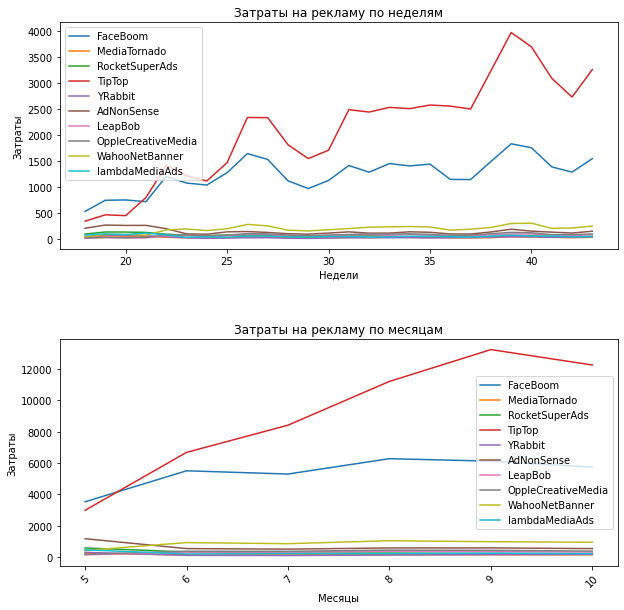

In [50]:
# выводим два графика по затратам на рекламу по неделям и по месяцам 
# выполняем группировку 
weekly_data = costs.groupby(['week', 'channel'])['costs'].sum().reset_index()
monthly_data = costs.groupby(['month', 'channel'])['costs'].sum().reset_index()

# задаём размеры
fig, axes = plt.subplots(nrows=2, figsize=(10, 10))
plt.subplots_adjust(hspace=0.4)

# строим недельный график
for channel in costs['channel'].unique():
    channel_data = weekly_data[weekly_data['channel'] == channel]
    axes[0].plot(channel_data['week'], channel_data['costs'], label=channel)

axes[0].set_title('Затраты на рекламу по неделям')
axes[0].set_xlabel('Недели')
axes[0].set_ylabel('Затраты')
axes[0].legend()

# строим месячный график
for channel in costs['channel'].unique():
    channel_data = monthly_data[monthly_data['channel'] == channel]
    axes[1].plot(channel_data['month'], channel_data['costs'], label=channel)

axes[1].set_title('Затраты на рекламу по месяцам')
axes[1].set_xlabel('Месяцы')
axes[1].set_ylabel('Затраты')
axes[1].legend()

plt.xticks(rotation=45)
plt.show()



**Затраты на Tip Top и Face Boom растут по неделям: Tip Top от 300 до 4000 USD, Face BOOM от 500 до 1500 USD на своих пиках. Пики достигаются между 39 и 40 неделями. Остальные источники идут равномерно низко, практически на нулях по затратам.** 


**По месяцам также видно рост Tip Top и Face Boom. Tip Top ещё больше отрывается (начало где-то с 3000 USD с 5 месяца и пик выше 12000 USD на 9 месяце). Face Boom начинает с 3800 USD примерно и идет практически ровно с самым высоким значением на 8 месяце в 5800 USD примерно. Остальные источники идут низко и практически равномерны по затратам. Затраты не поднимаются выше примерно 1700 USD.** 

### 4.4. Средняя стоимость привлечения одного пользователя по источникам (CAC).  

In [51]:
# группируем данные по рекламному каналу и средней стоимости привлечения пользователя
# сортируем по убыванию
profiles.groupby('channel').agg({'acquisition_cost':'mean'}).sort_values(by='acquisition_cost', ascending=False)

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


**Самая дорогая стоимость привлечения в 2,8 у TipTop - отрыв больше чем вдвое от второго места (FaceBoom - 1,11). 
Organic как и должно быть - 0, далее LeapBob - 0,21 и Media Tornado - 0,22.**

## 5. Оценка окупаемости рекламы.

### 5.1. Анализ  окупаемости рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.

In [52]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа

In [53]:
# исключаем органику
filtered_profiles = profiles[profiles['channel'] != 'organic']

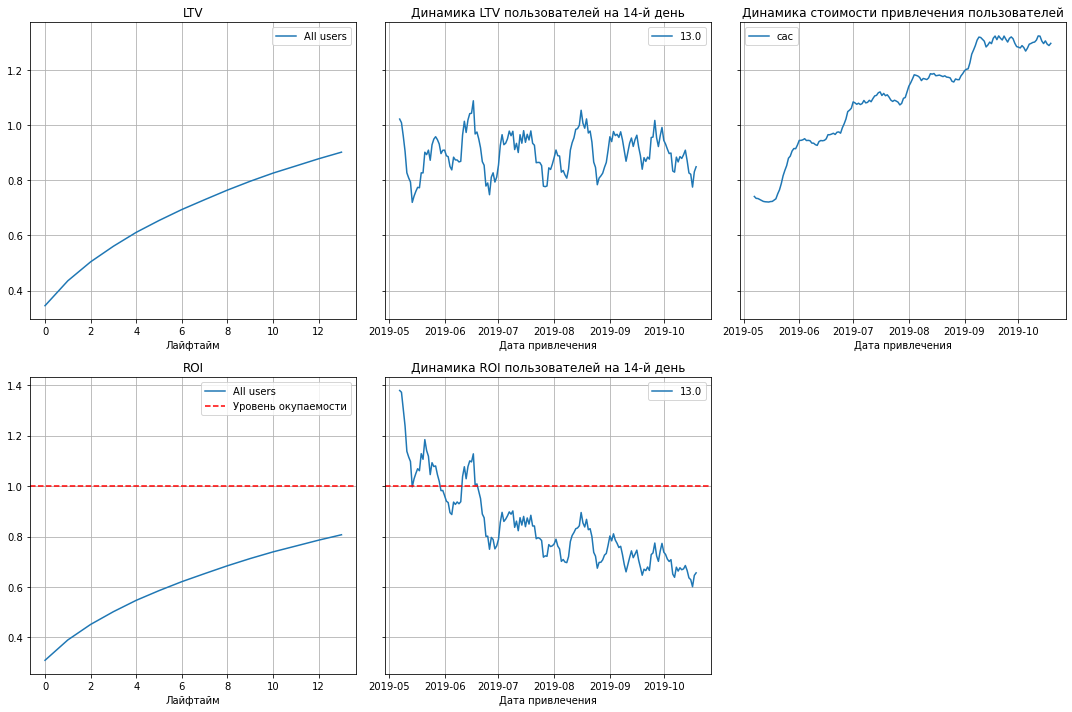

In [54]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    filtered_profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

**По графикам видно, что:**
 - реклама не окупается. ROI в конце второй недели — чуть выше 80%;
 - для майской когорты реклама окупается;
 - CAC начал расти с июня. Практически обратная связь видна между динамикой по когортам CAC и ROI - чем больше CAC для каждой когорты, тем меньше становилось ROI;
 - LTV достаточно стабилен. Дело не в ухудшении качества пользователей.

### 5.2. Анализ конверсии и удержания пользователей, их динамики.

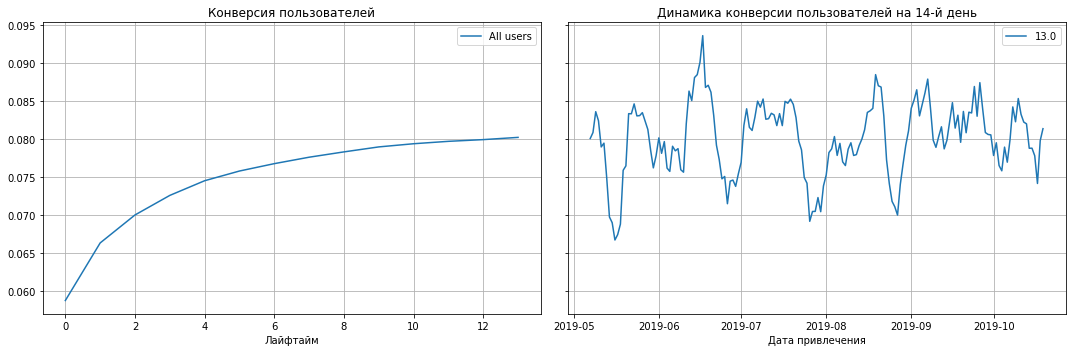

In [55]:
# смотрим конверсию 

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    filtered_profiles, orders, observation_date, horizon_days, dimensions=[]
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Конверсия пользователей стабильно росла (до 8% в конце второй недели). Конверсия по когортам варьируется от 6,7% до 9,4% - отличный результат.**

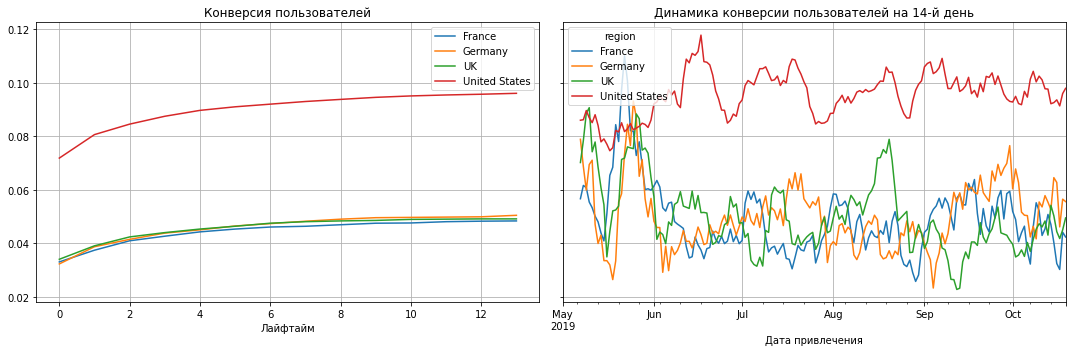

In [56]:
# смотрим конверсию по странам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    filtered_profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

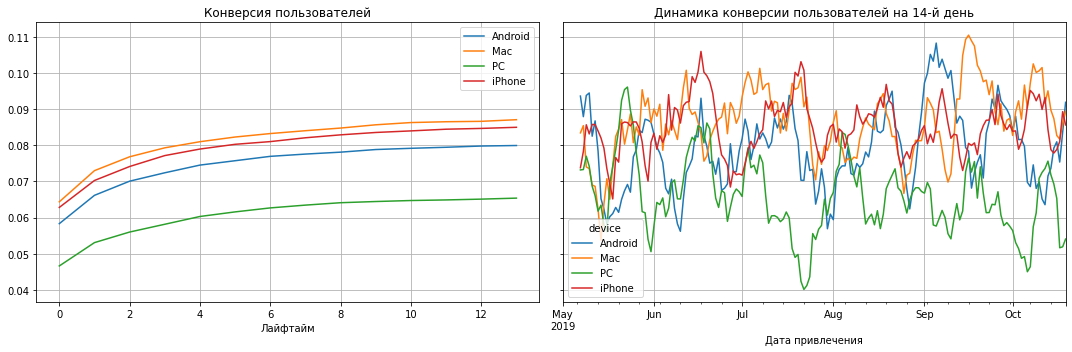

In [57]:
# смотрим конверсию по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    filtered_profiles, orders, observation_date, horizon_days, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

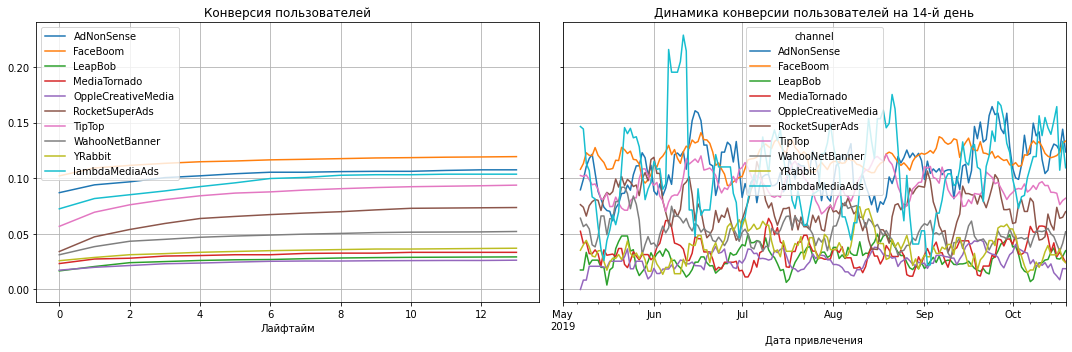

In [58]:
# смотрим конверсию по рекламным каналам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    filtered_profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Лучше всего в покупателей конвертируются пользователи:**
 - из США (с большим отрывом от других стран, достигает примерно 9,6%);
 - использующие Mac и iPhone (выше 8,5%);
 - пришедшие из FaceBoom, AdNoneSense и lambdaMediaAds (достигает выше 10%). Также неплохая конверсия у TipTop (достигает около 9%). 

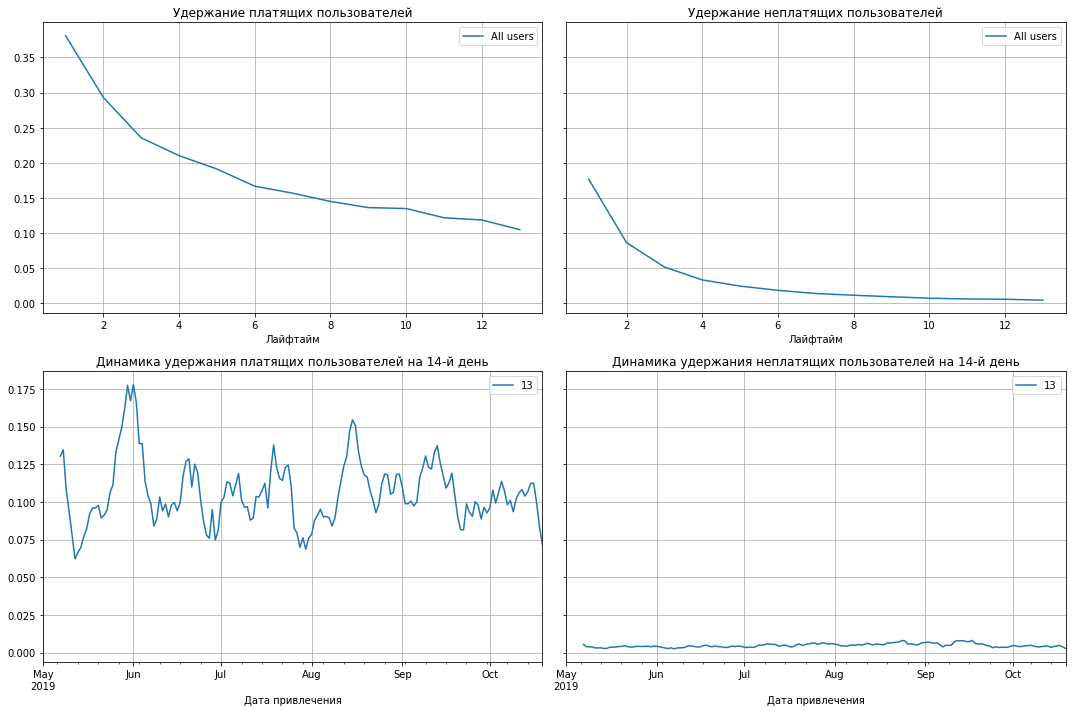

In [59]:
# смотрим удержание 

retention_raw, retention_grouped, retention_history = get_retention(
    filtered_profiles, visits, observation_date, horizon_days, dimensions=[]
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Удержание стабильно падает: для платных пользователей с 37% до 11%, для неплатящих - с 18% до практически 0%. 
В этом может быть основная причина падения прибыли. Необходимо понять, одинаково ли падение для всех устройств, каналов и стран, или нет.**

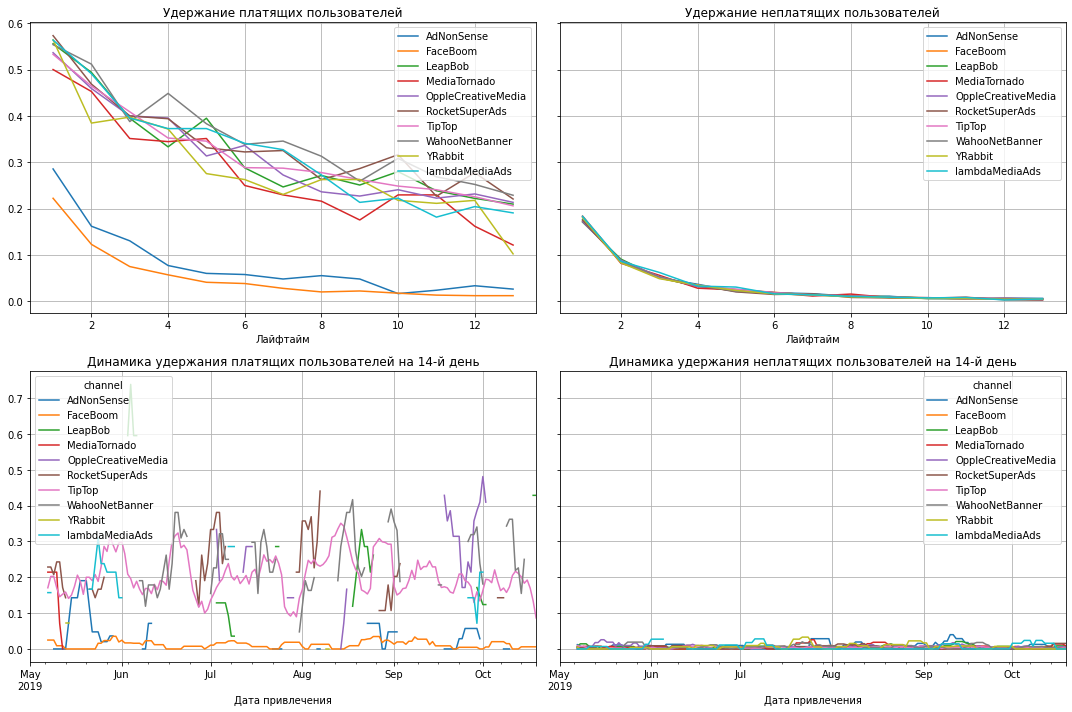

In [60]:
# смотрим удержание с разбивкой по рекламным каналам

retention_raw, retention_grouped, retention_history = get_retention(
    filtered_profiles, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days)

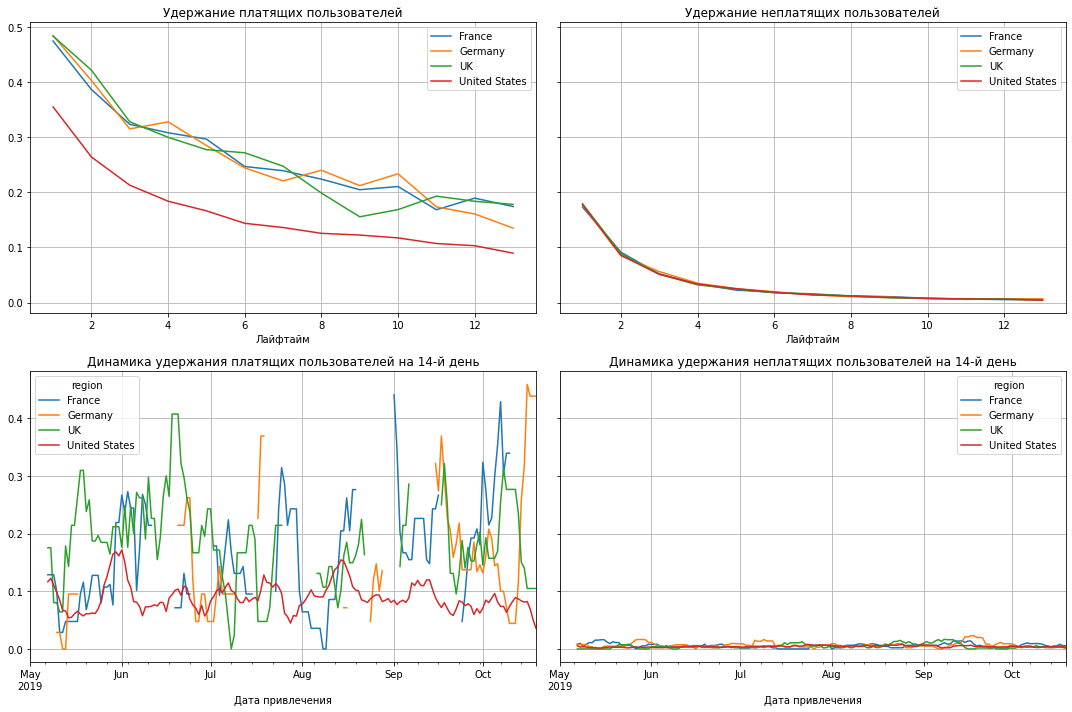

In [61]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    filtered_profiles, visits, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days)

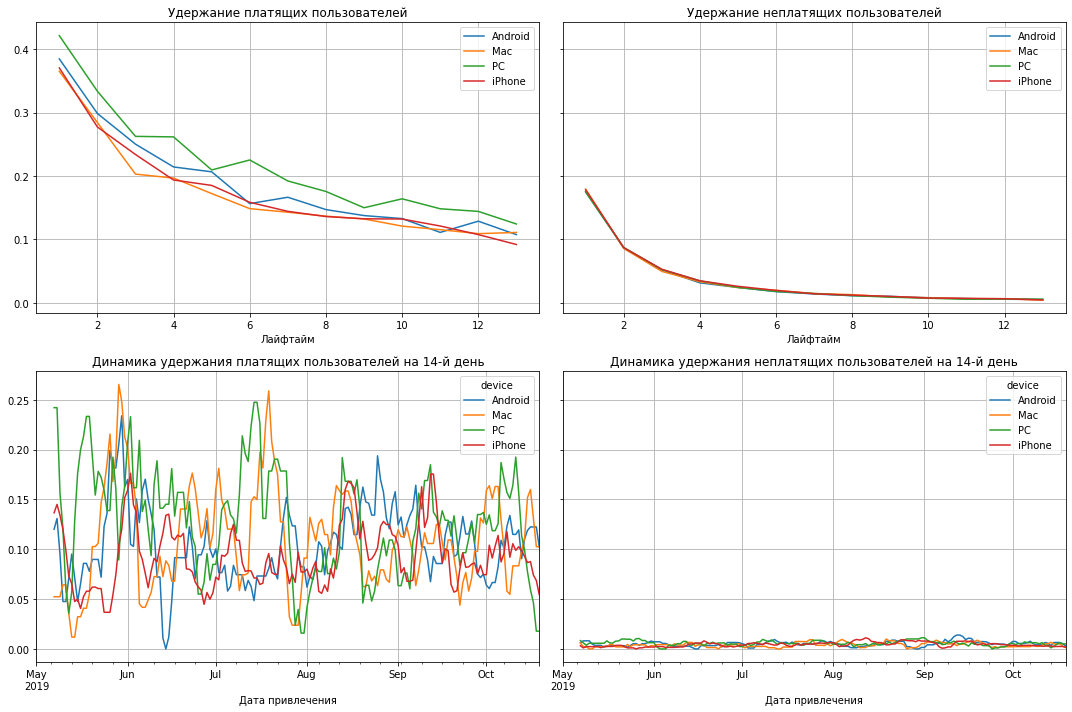

In [62]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    filtered_profiles, visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days)

**В целом удержание падает вне зависимости от устройств, стран или рекламных платформ. Это большая проблема приложения.**

Хуже всего удержание среди платных пользователей: 
 - с платформы FaceBoom и AdNonSense, 
 - из США, 
 - на iPhone и Mac. 

### 5.3. Окупаемость рекламы с разбивкой по устройствам. Графики LTV и ROI, графики динамики LTV, CAC и ROI.

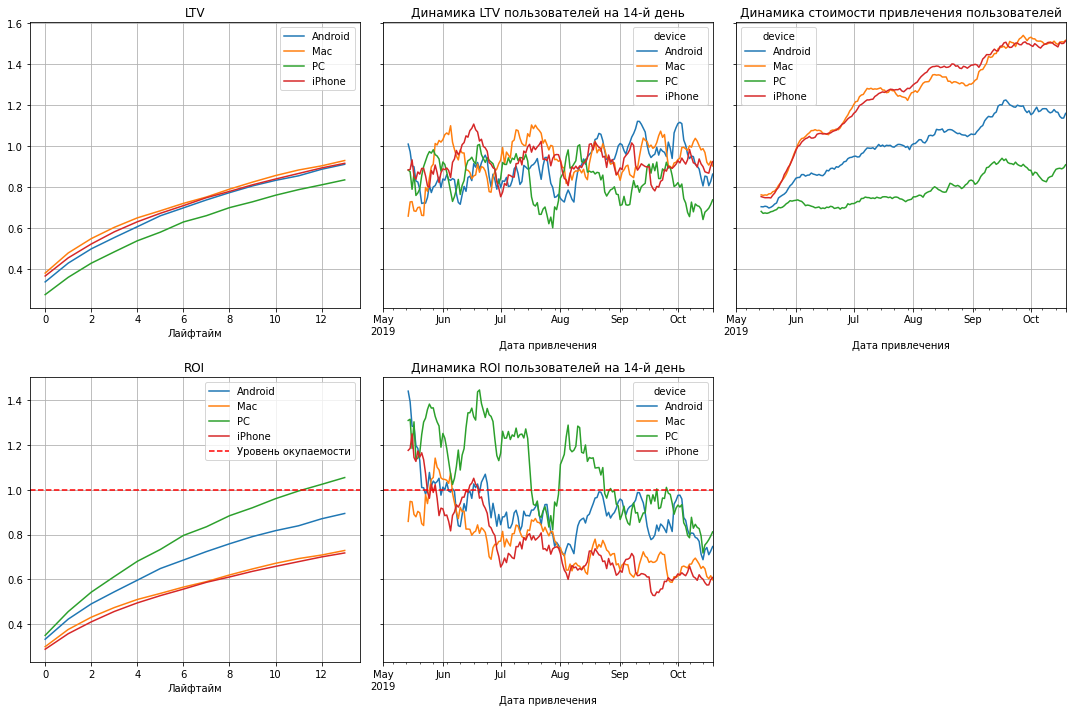

In [63]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    filtered_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**На графиках видно, что:** 
 - LTV растёт на всех устройствах (но меньше на PC);
 - в динамике по когортам также разницы нет, LTV стабилен;
 - CAC растёт на всех устройствах. Выше всего на Mac и iPhone, ниже всего на PC и посередине Android; 
 - реклама окупается только у PC. Iphone и Mac доходят только до 70% ROI на 14й день;
 - примерно половина когорт на PC окупается, помимо PC окупается еще Android и iPhone в июне. 

### 5.4. Окупаемость рекламы с разбивкой по странам. Графики LTV и ROI, графики динамики LTV, CAC и ROI.

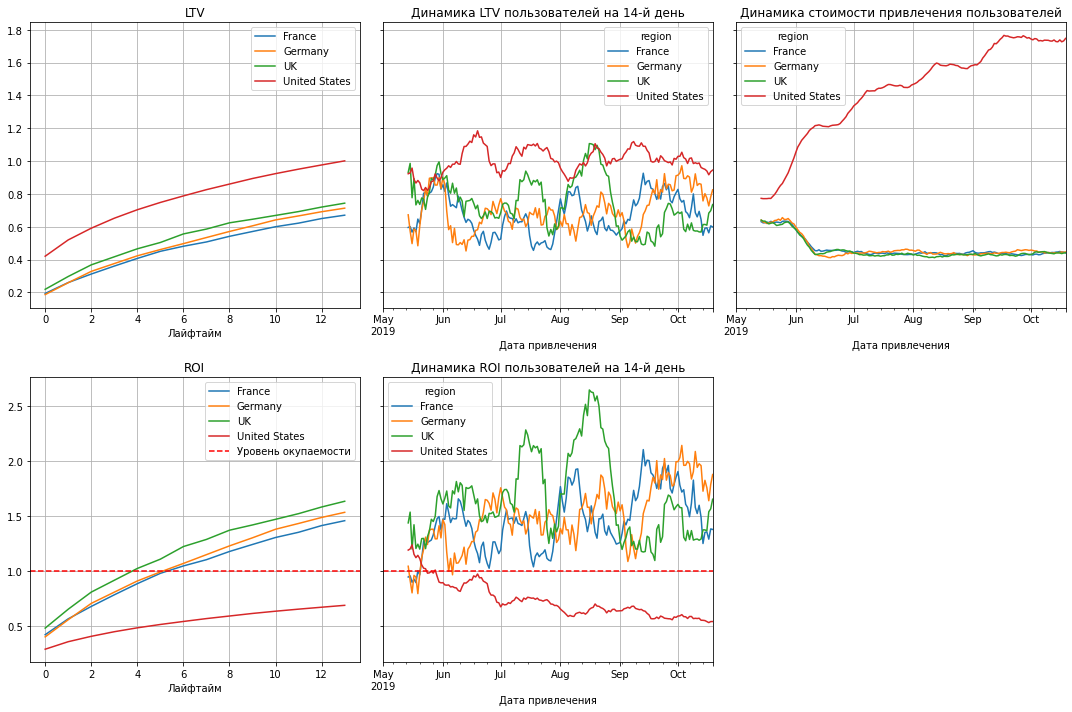

In [64]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    filtered_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**В разбивке по странам наблюдается следующее:** 
- LTV по странам стаблильно растёт. Выше всего LTV у США, остальные примерно на одном уровне, однако Франция ниже всех; 
- в динамике LTV равномерен; 
- CAC растёт только у США и достигает почти 1,8. У остальных стран CAC падает с 0,6 до 0,4 примерно;
- при этом реклама в США не окупается и доходит на 14 день примерно до 70%. В остальных странах реклама окупается; 
- динамика ROI также показывает постоянное падение окупаемости в США. В остальных странах динамика ROI довольно стабильна. 

### 5.5. Окупаемость рекламы с разбивкой по рекламным каналам. Графики LTV и ROI, графики динамики LTV, CAC и ROI.

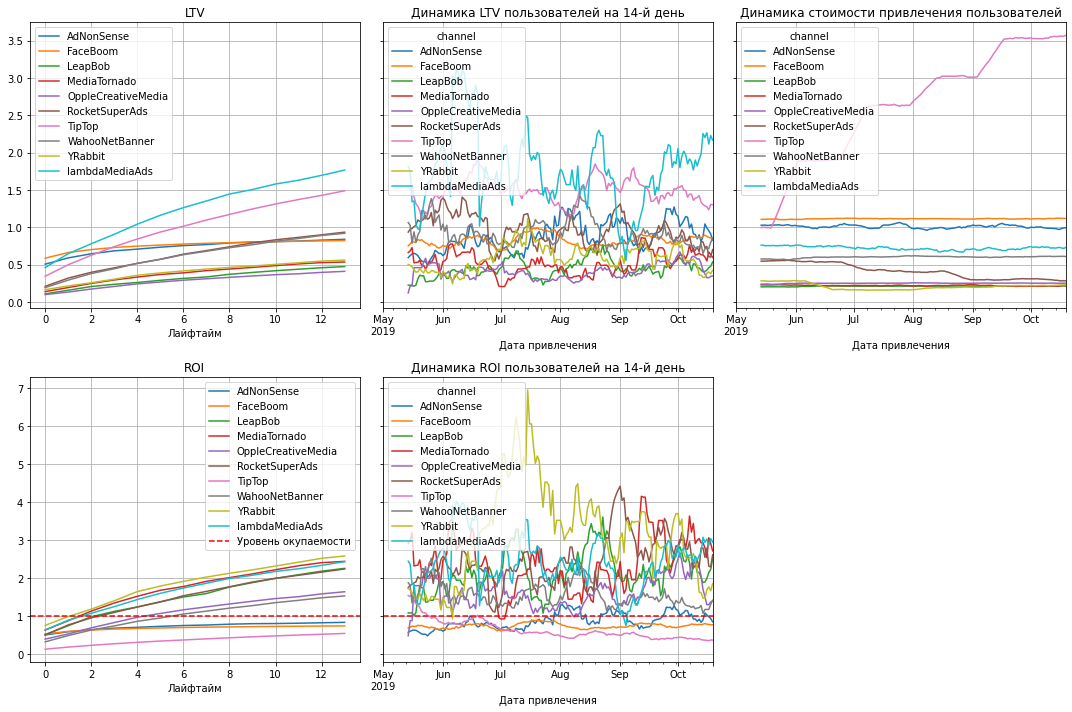

In [65]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    filtered_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**При декомпозиции по рекламным каналам наблюдается следующее:** 
- LTV лучше всего растёт у пришедших через канал lambdaMediaAds и TipTop. В остальных каналах также идёт рост, но менее значительный; 
- динамика LTV достаточно равномерная. Есть один скачок вверх у lambdaMediaAds между июнем и июлем;
- CAC растёт только у Tip Top и выходит за 3,5. У остальных каналов CAC не меняется и находится на уровнях от 0,2 до 1,1;
- не окупается реклама на трёх платформах: TipTop, FaceBoom, AdNoneSense. На остальных реклама окупается; 
- по динамике ROI также видно, что стабильно не окупается TipTop, FaceBoom, AdNonSense. 
Хорошо окупаются Yrabbit, MediaTornado, lambdaMediaAds.

<div style="border:solid Chocolate 2px; padding: 40px">

## Вывод по окупаемости рекламы: 

В целом реклама не окупается. 

Негативное влияние оказывают растущие вложения в рекламу: 
- на устройствах Iphone и Mac,
- в США,
- на платформах TipTop, FaceBoom, AdNoneSense.

По графикам видно высокое LTV и конверсию, а также существенный рост CAC на устройствах Iphone и Mac, в США и на платформу TipTop. 
При этом высокие вложения в рекламу не привели к окупаемости по всем указанным параметрам, но привели к снижению прибыли. 

Нужно разобраться с причиной низкого удержания клиентов, рассмотреть его по различным параметрам.

Важно, чтобы впредь при запуске рекламных кампаний отслеживание всех основных метрик (CAC, LTV, Retention Rate, MAU, WAU, DAU) велось ежедневно, иначе невозможно отслежить реальную эффективность вложений и легко уйти в убыток. 
    
**На данный момент необходимо приостановить инвестиции в рекламу до того, как будет выяснена причина постоянного падения удержания.**

<div style="border:solid Chocolate 2px; padding: 40px">

## Общий вывод.

#### Предобработка данных. 

На этапе предобработки не выявлено дубликатов и пропусков. Были скорректированы заголовки столбцов согласно pep8, заменены форматы дат на datetime. 

#### Исследовательский анализ. 

Было выявлено, что минимальная дата привлечения - 1 мая 2019 года, максимальная - 27 октября 2019 года.

Тенденции по пользователям: 
 - в США больше всего (в 5 раз больше остальных стран);
 - чаще используют iPhone и Android, причем у iPhone отрыв в 1,5 раза от Android;
 - из платных источников рекламы больше всего приносит Face Boom (29 тыс.), на втором месте - Tip Top (19,5 тыс.).


Тенденции по плательщикам: 

 - больше всего в США (7%), пользуются Mac и iPhone (6,4% и 6,2%), чаще всего приходят через Face Boom - 12,2% и Ad Non Sense - 11,3%; 
 - в других странах плательщиков значительно меньше: 4% в Германии, почти 4% в Великобритании, 3,8% во Франции; 
 - по устройствам отрыв не такой большой: 5,8% - Android, 5% - PC.


#### Анализ маркетинговых показателей. 

Было выяснено, что: 
 - общая стоимость расходов на маркетинг за исследуемый период - 105 497 USD;
 - больше всего денег потрачено на рекламу в Tip Top (54 751 USD) и Face Boom (32 445 USD), меньше всего в Yrabbit - 944 и в Media Tornado - 954;
 - затраты на Tip Top и Face Boom растут и по неделям, и по месяцам. Остальные источники идут равномерно низко, практически на нулях по затратам;
 - самая дорогая стоимость привлечения в 2,8 USD за пользователя у TipTop - отрыв больше чем вдвое от второго места (FaceBoom - 1,11 USD).

#### Оценка окупаемости рекламы. 

По графикам видно, что:

**CAC:** 
 - CAC начал расти с июня. Практически обратная связь видна между динамикой по когортам CAC и ROI - чем больше CAC для каждой когорты, тем меньше становилось ROI;
 - растёт на всех устройствах. Выше всего на Mac и iPhone, ниже всего на PC и посередине Android; 
 - сильно растёт только у США (почти 1,8). У остальных стран CAC падает с 0,6 до 0,4 примерно;
 - среди рекламных платформ растёт только у Tip Top и выходит за 3,5. У остальных каналов CAC не меняется и находится на уровнях от 0,2 до 1,1.


**LTV:** 
 - достаточно стабилен, то есть качество пользователей на должном уровне;
 - по странам стабильно растёт. Выше всего LTV у США, остальные примерно на одном уровне, однако Франция ниже всех; 
 - растёт на всех устройствах (но меньше на PC);
 - лучше всего растёт у пришедших через канал lambdaMediaAds и TipTop. В остальных каналах также идёт рост, но менее значительный; 

**Конверсия:** 
 - **стабильно растёт** (до 8% в конце второй недели). Конверсия по когортам варьируется от 6,7% до 9,4% - отличный результат. 
 
 Лучше всего в покупателей конвертируются пользователи:
 - из США (с большим отрывом от других стран, достигает примерно 9,6%);
 - использующие Mac и iPhone (выше 8,5%);
 - пришедшие из FaceBoom, AdNoneSense и lambdaMediaAds (достигает выше 10%). Также неплохая конверсия у TipTop (достигает около 9%). 
 
**Удержание:**
 - **стабильно падает** вне зависимости от устройств, стран или рекламных платформ: для платных пользователей с 37% до 11%, для неплатящих - с 18% до практически 0%.

Хуже всего удержание среди платных пользователей: 
 - с платформы FaceBoom и  AdNonSense, 
 - из США, 
 - на iPhone и Mac.  
 

**Окупаемость рекламы:** 
 - **реклама не окупается**. ROI в конце второй недели — чуть выше 80%;
 - по платформам окупается только у PC. Iphone и Mac доходят только до 70% ROI на 14й день; 
 - реклама в США не окупается и доходит на 14 день примерно до 70%. В остальных странах реклама окупается; 
Динамика ROI по когортам также показывает постоянное падение окупаемости в США. В остальных странах динамика ROI довольно стабильна;
 - стабильно не окупаются рекламные каналы TipTop, FaceBoom, AdNoneSense. 
 Хорошо окупаются Yrabbit, MediaTornado, lambdaMediaAds.
 
 
### Основной вывод и рекомендации:

По графикам видно отличное LTV и конверсию по всем основным параметрам, которые учитывает отдел рекламы и куда вкладывается бюджет: 
- рынок США; 
- устройства iPhone и Mac;
- рекламная платформа Face Boom и TipTop. 

Однако пока удержание будет так сильно падать, нет смысла вкладывать средства в рекламу, пользователи всё равно уходят, хотя и готовы были платить. До того, как будет найдена и устранена причина падения удержания, стоит приостановить рекламные кампании.

Необходимо отдельно исследовать данные с отметками о событиях в приложении для анализа возможных технических проблем. На данный момент эти данные не предоставлены.